# Stack Overflow Developer Survey, 2017

## 1. Business Understanding
The goal of this analysis is to explore key questions that impact developer behavior, compensation, and engagement on Stack Overflow. Specifically, we are interested in:
- How formal education impacts the average salary of developers.
- How user account status affects engagement on Stack Overflow.
- Which countries have the highest proportion of developers who program as a hobby or contribute to open source projects.
These insights can help businesses better understand talent acquisition, retention, and developer engagement strategies.

## 2. Data Understanding
We use the Stack Overflow Developer Survey 2017 dataset, which contains over 64,000 responses from developers across the globe. Key columns used in the analysis include:

- Salary: The annual salary of respondents.
- FormalEducation: The highest level of formal education achieved.
- ProgramHobby: Whether respondents program as a hobby or contribute to open-source projects.
- StackOverflowDescribes: A description of respondents' usage of Stack Overflow (e.g., login, CV creation).
- Country: The country of the respondent.


First few rows:
   Respondent                                       Professional  \
0           1                                            Student   
1           2                                            Student   
2           3                             Professional developer   
3           4  Professional non-developer who sometimes write...   
4           5                             Professional developer   

                ProgramHobby         Country      University  \
0                  Yes, both   United States              No   
1                  Yes, both  United Kingdom  Yes, full-time   
2                  Yes, both  United Kingdom              No   
3                  Yes, both   United States              No   
4  Yes, I program as a hobby     Switzerland              No   

                         EmploymentStatus  \
0  Not employed, and not looking for work   
1                      Employed part-time   
2                      Employed full-time   
3        

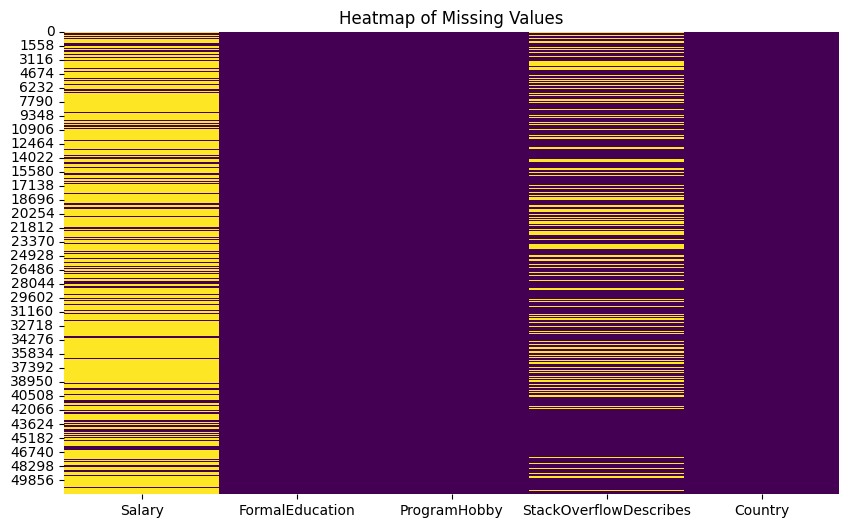

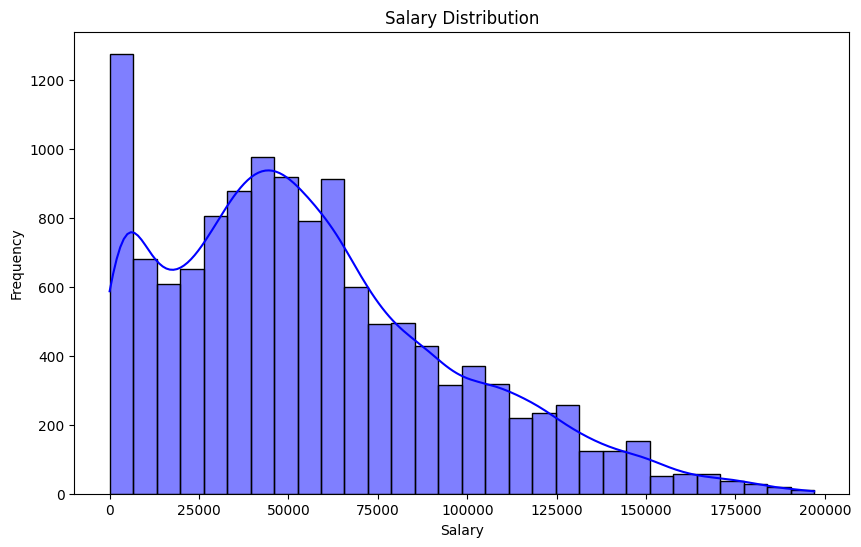

/var/folders/lz/mctt14cx1qqg__kqflg4xxt00000gn/T/ipykernel_73570/593375700.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['FormalEducation'], order=df['FormalEducation'].value_counts().index, palette="Set2")


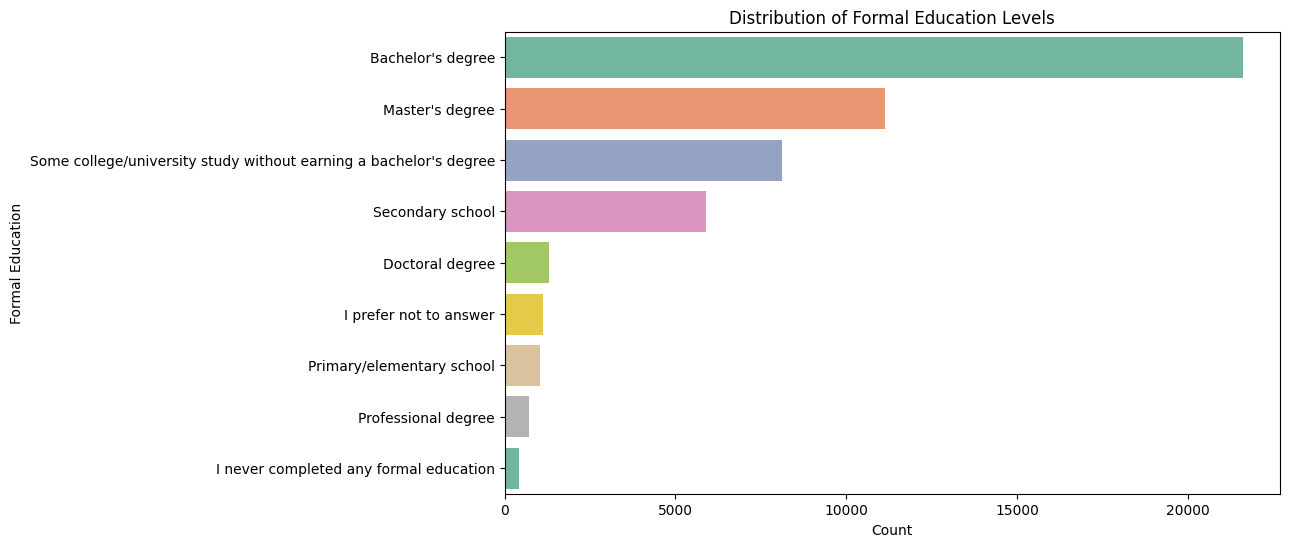

/var/folders/lz/mctt14cx1qqg__kqflg4xxt00000gn/T/ipykernel_73570/593375700.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['ProgramHobby'], order=df['ProgramHobby'].value_counts().index, palette="Set3")


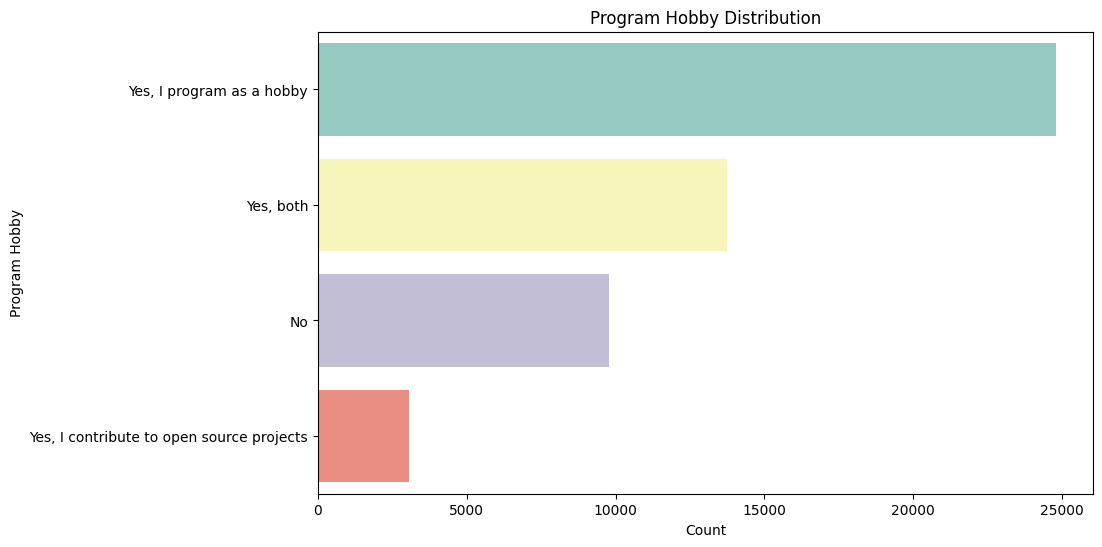

/var/folders/lz/mctt14cx1qqg__kqflg4xxt00000gn/T/ipykernel_73570/593375700.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['StackOverflowDescribes'], order=df['StackOverflowDescribes'].value_counts().index, palette="Set1")


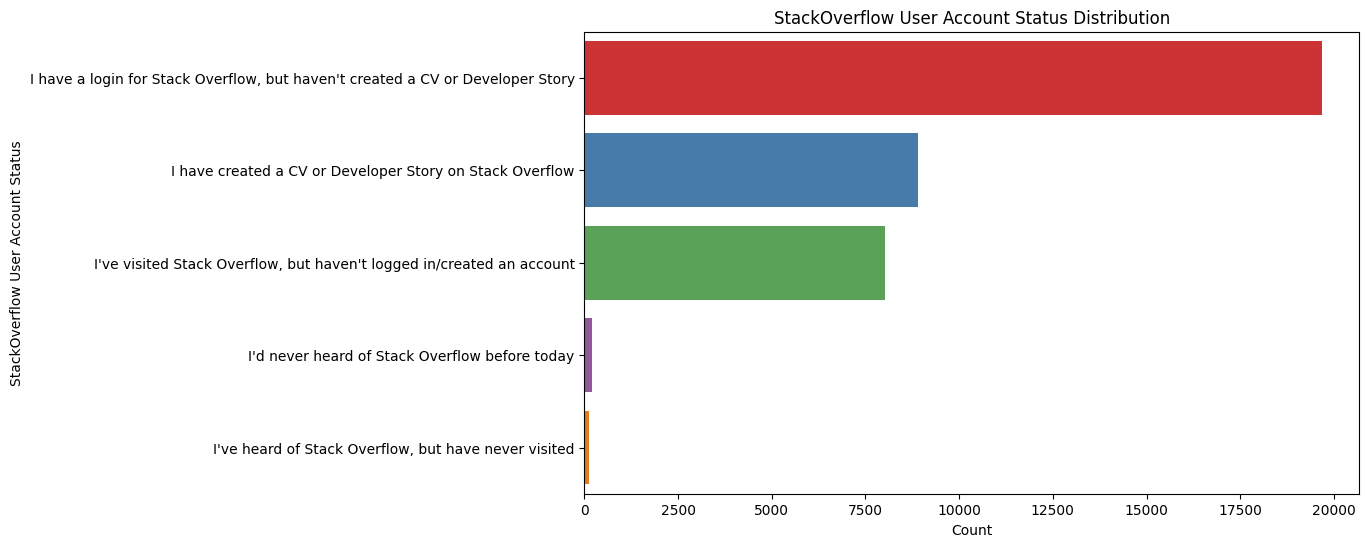

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('./survey_results_public.csv')

# Check the first few rows to understand the data structure
print("\nFirst few rows:")
print(df.head())

# Check for missing values in the columns relevant to our analysis
print("\nMissing values count:")
print(df[['Salary', 'FormalEducation', 'ProgramHobby', 'StackOverflowDescribes', 'Country']].isnull().sum())

# Visualize missing values using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Salary', 'FormalEducation', 'ProgramHobby', 'StackOverflowDescribes', 'Country']].isnull(), cbar=False, cmap="viridis")
plt.title('Heatmap of Missing Values')
plt.show()

# Visualizing distribution of key variables:
## Distribution of Salary
plt.figure(figsize=(10, 6))
sns.histplot(df['Salary'].dropna(), kde=True, bins=30, color='blue')
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

## Distribution of Formal Education
plt.figure(figsize=(10, 6))
sns.countplot(y=df['FormalEducation'], order=df['FormalEducation'].value_counts().index, palette="Set2")
plt.title('Distribution of Formal Education Levels')
plt.xlabel('Count')
plt.ylabel('Formal Education')
plt.show()

## Program Hobby Distribution
plt.figure(figsize=(10, 6))
sns.countplot(y=df['ProgramHobby'], order=df['ProgramHobby'].value_counts().index, palette="Set3")
plt.title('Program Hobby Distribution')
plt.xlabel('Count')
plt.ylabel('Program Hobby')
plt.show()

## StackOverflow User Status Distribution
plt.figure(figsize=(10, 6))
sns.countplot(y=df['StackOverflowDescribes'], order=df['StackOverflowDescribes'].value_counts().index, palette="Set1")
plt.title('StackOverflow User Account Status Distribution')
plt.xlabel('Count')
plt.ylabel('StackOverflow User Account Status')
plt.show()

### 2.1 Missing Values
A heatmap is generated to visualize where missing values are present, allowing us to decide whether to drop or impute them. Our initial exploration of the data shows that some columns have missing values, particularly in Salary, FormalEducation, and ProgramHobby.

#### 2.1.1 Why We Can Drop Missing Values:
- Salary and FormalEducation are critical to our analysis of how education impacts salary. Rows with missing values in these columns can't contribute meaningful data to this analysis and can be dropped.
- ProgramHobby and StackOverflowDescribes are key for understanding user engagement and programming habits, so missing values in these columns should also be dropped, as they provide no information for the analysis.
- Country: Rows missing country information will make it impossible to group by region, so they are dropped.

### 2.2 Distribution Visualizations:
- Salary: A histogram with a KDE to visualize the salary distribution.
- Formal Education: A count plot to show the distribution of respondents by their highest formal education level.
- Program Hobby: A count plot to see how many developers program as a hobby or contribute to open source.
- StackOverflow User Status: A count plot to understand how respondents describe their Stack Overflow usage.
- Country Distribution: A count plot showing the distribution of respondents by country, filtered to only include countries with more than 100 respondents.

## 3. Data Preparation

### 3.1 Question 1
#### How does formal education impact the average salary of developers?

Many people believe that the gain in salary started to drop once you recevied the bachelor's degree. TO do so, we use this data to investigate into that by gouping certain education levels together and find the average salary

Steps:
- Handling Missing Data: We will remove rows where the Salary or FormalEducation columns have missing values to ensure clean data for analysis.
- Grouping Education Levels: We combine certain lower education levels into a unified category: `Secondary school`, `Some college/university study without earning a bachelor's degree`, `Primary/elementary school`, `I never completed any formal education`. These are grouped together into a single category, `Less than a Bachelors`, to provide lower education.


/var/folders/lz/mctt14cx1qqg__kqflg4xxt00000gn/T/ipykernel_73570/2525773114.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_salary_edu['GroupedEducation'] = df_salary_edu['FormalEducation'].map(education_map)
/var/folders/lz/mctt14cx1qqg__kqflg4xxt00000gn/T/ipykernel_73570/2525773114.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_salary_by_education.index, y=avg_salary_by_education, palette="Blues_d")
/var/folders/lz/mctt14cx1qqg__kqflg4xxt00000gn/T/ipykernel_73570/2525773114.py:32: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now co

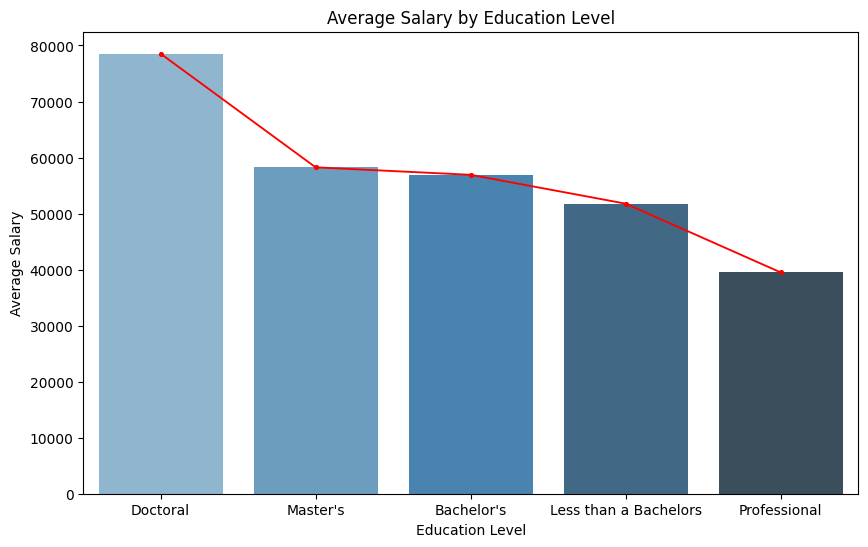

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('./survey_results_public.csv')

# Drop rows with missing 'Salary' or 'FormalEducation'
df_salary_edu = df.dropna(subset=['Salary', 'FormalEducation'])

# Group certain education levels together
education_map = {
    'Secondary school': 'Less than a Bachelors',
    "Some college/university study without earning a bachelor's degree": 'Less than a Bachelors',
    'Primary/elementary school': 'Less than a Bachelors',
    'I never completed any formal education': 'Less than a Bachelors',
    "Bachelor's degree": 'Bachelor\'s',
    "Master's degree": 'Master\'s',
    "Doctoral degree": 'Doctoral',
    'Professional degree': 'Professional'
}

# Apply the mapping to the FormalEducation column
df_salary_edu['GroupedEducation'] = df_salary_edu['FormalEducation'].map(education_map)

# Calculate the average salary for each education level across all countries
avg_salary_by_education = df_salary_edu.groupby('GroupedEducation')['Salary'].mean().sort_values(ascending=False)

# Plot the results
plt.figure(figsize=(10,6))
sns.barplot(x=avg_salary_by_education.index, y=avg_salary_by_education, palette="Blues_d")
sns.pointplot(x=avg_salary_by_education.index, y=avg_salary_by_education, color='red', markers='o', linestyles='-', scale=0.5)

plt.title('Average Salary by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Salary')
plt.show()


### Discussions
- We can see that obtaining a master's degree results in only a slight increase in salary.
- Surprisingly, those with a professional degree earn less on average than those without a bachelor's degree.

### 3.2 Question 2
#### How does user account status on Stack Overflow affect their activity levels across various site activities?

This question explores whether the level of engagement or interaction on Stack Overflow differs based on the type of user account. Specifically, it examines how frequently users with different account statuses (e.g., no login, login without a CV/Story, or having created a CV/Story) perform activities like finding answers, copying code, or asking questions.

Steps:
- Remove rows where respondents indicated they had `never heard of Stack Overflow` or had `never visited.` These users don't contribute meaningfully to the activity data.
- The activity levels are recorded using terms like `Once or twice` and `At least once each day.` These terms are mapped to numerical values, where `Haven't done at all` is 0, and `At least once each day` is 4. This allows us to quantitatively compare activity across different users.
- Users are categorized based on their responses in the StackOverflowDescribes column:
  - `Visited, no login`: Users who visited Stack Overflow but did not log in or create an account.
  - `Login, no CV/Story`: Users who logged in but did not create a CV or Developer Story.
  - `Created CV/Story`: Users who created a CV or Developer Story on Stack Overflow.

/var/folders/lz/mctt14cx1qqg__kqflg4xxt00000gn/T/ipykernel_63279/2685853603.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_activity_filtered[col] = df_activity_filtered[col].replace(activity_replace)


<Figure size 1200x800 with 0 Axes>

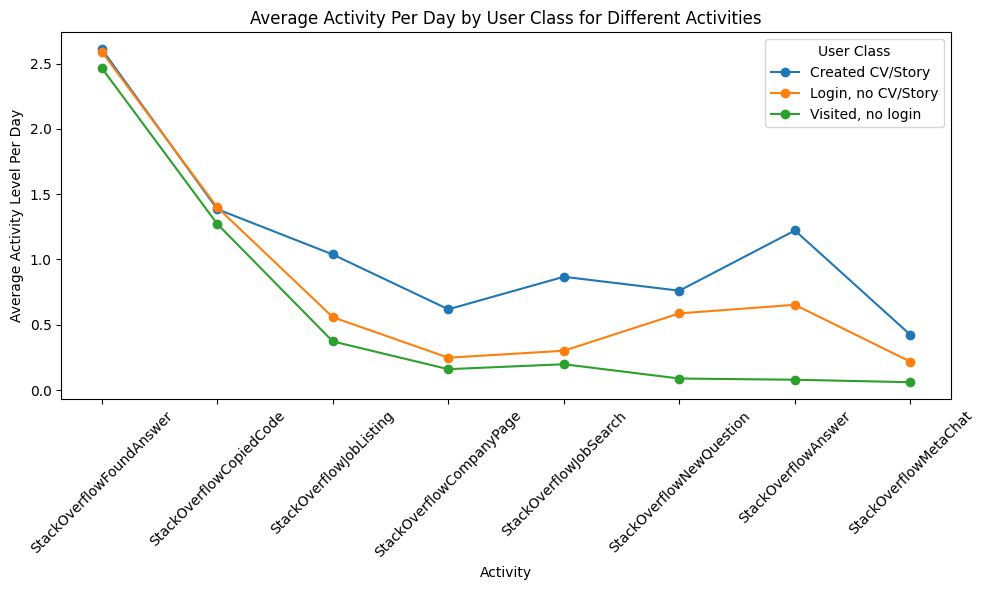

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('./survey_results_public.csv')

# Drop rows with missing 'StackOverflowDescribes' and filter out users who never heard of Stack Overflow
df_activity_filtered = df.dropna(subset=['StackOverflowDescribes'])
df_activity_filtered = df_activity_filtered[~df_activity_filtered['StackOverflowDescribes'].isin([
    "I'd never heard of Stack Overflow before today",
    "I've heard of Stack Overflow, but have never visited"
])]

# List of activity-related columns
activity_columns = ['StackOverflowFoundAnswer', 'StackOverflowCopiedCode', 
                    'StackOverflowJobListing', 'StackOverflowCompanyPage', 
                    'StackOverflowJobSearch', 'StackOverflowNewQuestion', 
                    'StackOverflowAnswer', 'StackOverflowMetaChat']

# Replace activity levels with numerical values for analysis
activity_replace = {
    "Haven't done at all": 0,
    "Once or twice": 1,
    "Several times": 2,
    "At least once each week": 3,
    "At least once each day": 4
}

for col in activity_columns:
    df_activity_filtered[col] = df_activity_filtered[col].replace(activity_replace)

# Map 'StackOverflowDescribes' to user categories
user_category_map = {
    "I've visited Stack Overflow, but haven't logged in/created an account": 'Visited, no login',
    "I have a login for Stack Overflow, but haven't created a CV or Developer Story": 'Login, no CV/Story',
    "I have created a CV or Developer Story on Stack Overflow": 'Created CV/Story'
}

df_activity_filtered['UserClass'] = df_activity_filtered['StackOverflowDescribes'].map(user_category_map)

# Calculate the average activity level per day for each user class and activity
avg_activity_by_class = df_activity_filtered.groupby('UserClass')[activity_columns].mean()

# Plot the results
plt.figure(figsize=(12,8))
avg_activity_by_class.T.plot(kind='line', marker='o', figsize=(10,6))
plt.title('Average Activity Per Day by User Class for Different Activities')
plt.xlabel('Activity')
plt.ylabel('Average Activity Level Per Day')
plt.xticks(rotation=45)
plt.legend(title='User Class')
plt.tight_layout()
plt.show()


### Discussions
- As expected, users who have created a CV or Developer Story are more likely to engage with Stack Overflow compared to those who simply log in. Similarly, users who log in tend to be more active than those who only visit without logging in.
- Most people who visit Stack Overflow primarily use it to find answers and copy code, which is a reasonable use of the platform.

### 3.3 Question 3
#### Which countries have the highest proportion of developers who program as a hobby or contribute to open source projects?
Steps:
- Handling Missing Data: Rows where `ProgramHobby` or `Country` are missing are dropped.
- We create a new column to mark respondents. The responses in the ProgramHobby column like `Yes, both`, `Yes, I program as a hobby`, or `Yes, I contribute to open source projects` are classified as hobby programmers.
- To ensure the reliability, we filter out countries with fewer than 100 respondents.

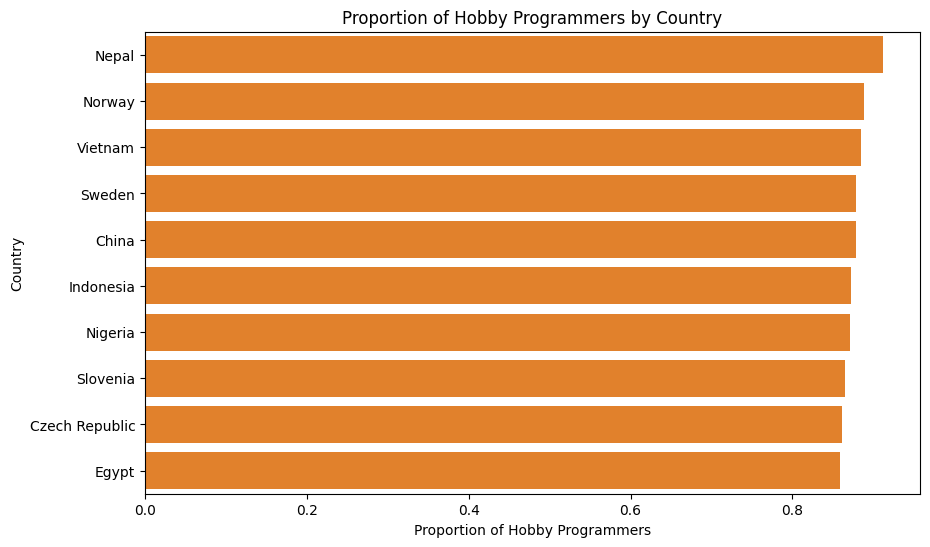

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('./survey_results_public.csv')

# Drop rows with missing 'ProgramHobby' or 'Country' values
df_hobby = df.dropna(subset=['ProgramHobby', 'Country'])

# Create a new column 'HobbyProgrammer' based on whether respondents program as a hobby
df_hobby['HobbyProgrammer'] = df_hobby['ProgramHobby'].apply(lambda x: x in ['Yes, both', 
                                                                             'Yes, I program as a hobby',
                                                                             'Yes, I contribute to open source projects'])

# Filter countries with more than 100 respondents
country_count = df_hobby['Country'].value_counts()
countries_with_300_plus = country_count[country_count >= 100].index
df_hobby = df_hobby[df_hobby['Country'].isin(countries_with_300_plus)]

# Calculate the proportion of hobbyist programmers by country
country_hobby = df_hobby.groupby('Country')['HobbyProgrammer'].mean().sort_values(ascending=False)
top_10_countries = country_hobby.head(10)

# Plot the results in a bar chart
plt.figure(figsize=(10,6))
sns.barplot(y=top_10_countries.index, x=top_10_countries, color=sns.color_palette()[1])
plt.title('Proportion of Hobby Programmers by Country')
plt.xlabel('Proportion of Hobby Programmers')
plt.ylabel('Country')
plt.show()

### Discussions
- It is surprising that half of the programmers are doing this purely for fun.

## 4. Modeling
For this analysis, we are not building predictive models but rather calculating summary statistics and visualizations to answer the business questions.

- Bar Chart: Used to visualize the average salary by education level and the proportion of hobby programmers by country.
- Line Graph: Used to compare activity levels based on Stack Overflow user account status.


## 5. Evaluation
Evaluation is done by interpreting the results of the visualizations:

`Question 1`: The bar chart shows only a slight increase in salary for master's degrees, with surprisingly lower average salaries for professional degrees compared to bachelor's degrees.

`Question 2`: Users who have created a CV/Story are more engaged with Stack Overflow compared to those who have not logged in or haven't created a CV.

`Question 3`: Some countries show high engagement in programming as a hobby, with a significant number of developers coding purely for fun.


## 6. Deployment
The results can be used by businesses and stakeholders to make data-driven decisions regarding hiring, developer engagement, and understanding developer behavior across different regions.

For Talent Acquisition: Focus on regions with high proportions of hobbyist programmers.
For Stack Overflow Engagement: Recognize that users who create CVs are more active, possibly indicating higher engagement potential.